In [1]:
# importer la lib pandas pour le traitement sur le jeux de données
import pandas as pd
# read the csv-formatted data file into a pandas dataframe
df=pd.read_csv('diabetes-1.csv')
# get shape of data frame
print('Shape (n_rows,n_columns) of dataframe:',df.shape)
# print top 5 rows of data frame
df.head(50)

Shape (n_rows,n_columns) of dataframe: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
#statistical summary of data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# La lib numpy offre plusieurs fonction très utiles, comme par exemple: elle nous permet de crèer une nouvelle colonne dans notre
# dataframe si une condition est satisfaite
import numpy as np

def imputeColumns(dataset):
    # create a list of columns that we will impute with the average non-zero value in each column
    columnsToImpute=['Glucose', 'BloodPressure', 'SkinThickness','BMI']

    for c in columnsToImpute:
        avgOfCol=dataset[dataset[c]>0][[c]].mean()
        dataset[c+'_imputed']=np.where(dataset[[c]]!=0,dataset[[c]],avgOfCol)

In [4]:
imputeColumns(df)

In [5]:
df.drop('Insulin',axis=1,inplace=True)
df[df.Glucose==0][['Glucose','Glucose_imputed']].head()
df.drop('Glucose',axis=1,inplace=True)
df.drop('BMI',axis=1,inplace=True)
df.drop('BloodPressure',axis=1,inplace=True)
df.drop('SkinThickness',axis=1,inplace=True)

In [6]:
df.describe()

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_imputed,BloodPressure_imputed,SkinThickness_imputed,BMI_imputed
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.471876,33.240885,0.348958,121.686763,72.405184,29.153420,32.457464
std,3.369578,0.331329,11.760232,0.476951,30.435949,12.096346,8.790942,6.875151
min,0.000000,0.078000,21.000000,0.000000,44.000000,24.000000,7.000000,18.200000
25%,1.000000,0.243750,24.000000,0.000000,99.750000,64.000000,25.000000,27.500000
50%,3.000000,0.372500,29.000000,0.000000,117.000000,72.202592,29.153420,32.400000
75%,6.000000,0.626250,41.000000,1.000000,140.250000,80.000000,32.000000,36.600000
max,17.000000,2.420000,81.000000,1.000000,199.000000,122.000000,99.000000,67.100000


In [7]:
df.head(50)

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_imputed,BloodPressure_imputed,SkinThickness_imputed,BMI_imputed
0,6,0.627,50,1,148.0,72.000000,35.00000,33.600000
1,1,0.351,31,0,85.0,66.000000,29.00000,26.600000
2,8,0.672,32,1,183.0,64.000000,29.15342,23.300000
3,1,0.167,21,0,89.0,66.000000,23.00000,28.100000
4,0,2.288,33,1,137.0,40.000000,35.00000,43.100000
5,5,0.201,30,0,116.0,74.000000,29.15342,25.600000
6,3,0.248,26,1,78.0,50.000000,32.00000,31.000000
7,10,0.134,29,0,115.0,72.405184,29.15342,35.300000
8,2,0.158,53,1,197.0,70.000000,45.00000,30.500000
9,8,0.232,54,1,125.0,96.000000,29.15342,32.457464


In [8]:
# division du dataset en 03 partie train val test 
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
# 0,3 pour préciser que 30% seront pour l'ensemble de test et 70% pour l'entrainement
train, test, val = np.split(df.sample(frac=1,random_state=42),[int(.6*len(df)),int(.8*len(df))]) 


In [9]:
print(df.shape)
print(train.shape)
print(val.shape)
print(test.shape)

(768, 8)
(460, 8)
(154, 8)
(154, 8)


Best Validation Loss: 0.5639
Best Validation Accuracy: 0.7792


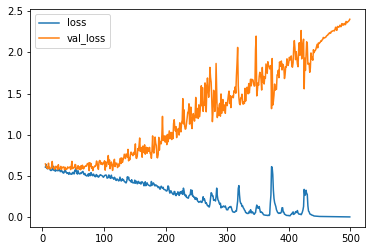

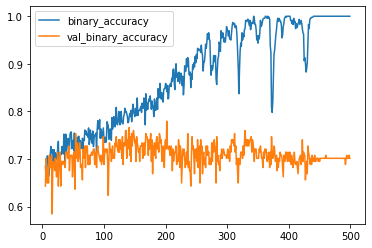

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
#selection des entrees et sortie du reseau
train_input=train[['Pregnancies', 'Glucose_imputed', 'BloodPressure_imputed', 'SkinThickness_imputed','BMI_imputed', 'DiabetesPedigreeFunction', 'Age']]
test_input=test[['Pregnancies', 'Glucose_imputed', 'BloodPressure_imputed', 'SkinThickness_imputed','BMI_imputed', 'DiabetesPedigreeFunction', 'Age']]
val_input=val[['Pregnancies', 'Glucose_imputed', 'BloodPressure_imputed', 'SkinThickness_imputed','BMI_imputed', 'DiabetesPedigreeFunction', 'Age']]
train_output=train[['Outcome']]
test_output=test[['Outcome']]
val_output=val[['Outcome']]
model=keras.Sequential([layers.Dense(512,activation='relu',input_shape=[7]),
                       layers.Dense(512,activation='relu'),
                       layers.Dense(512,activation='relu'),
                       layers.Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='binary_accuracy')
history=model.fit(train_input,train_output,validation_data=(val_input,val_output),epochs=500,verbose=0)
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))
resultat1=[history_df['val_loss'].min()]
resultat2=[history_df['val_binary_accuracy'].max()]

In [16]:
path='./models_compiles/diabetes2/'
model.save_weights(path)

In [18]:
model.save('./models_compiles/modelDiabete.h5')

<AxesSubplot:>

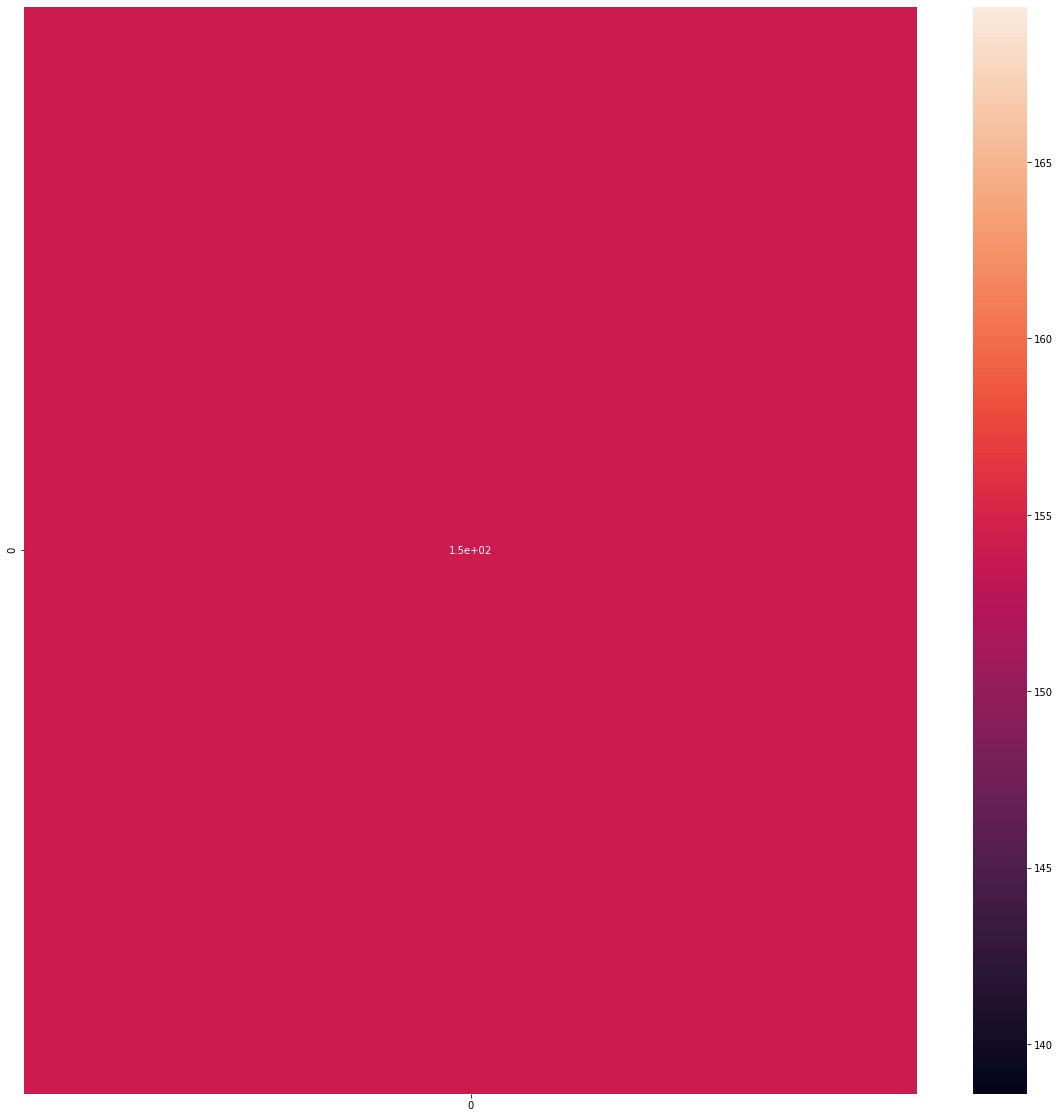

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import string

y_pred=model.predict(test_input)
labels=string.digits+string.ascii_lowercase+string.ascii_uppercase
plt.subplots(figsize=(20,20))
#ns.heatmap(confusion_matrix(np.argmax(test_output,axis=1),np.argmax(y_pred,axis=1)),xticklabels=labels,yticklabels=labels)
cf_matrix=confusion_matrix(np.argmax(test_output,axis=1),np.argmax(y_pred,axis=1))
sns.heatmap(cf_matrix, annot=True)

In [25]:
y_pred

array([[2.6879378e-28],
       [7.5843740e-01],
       [4.9314980e-10],
       [9.9982584e-01],
       [3.9999178e-01],
       [2.4239170e-35],
       [6.2648621e-16],
       [9.6801388e-01],
       [5.1045418e-02],
       [8.6245489e-01],
       [2.9511258e-01],
       [7.1406484e-02],
       [8.2101786e-01],
       [1.7091632e-03],
       [2.4169683e-04],
       [3.5676867e-02],
       [1.0000000e+00],
       [1.1686757e-06],
       [4.5048118e-02],
       [4.3692653e-06],
       [3.8713217e-04],
       [5.9055296e-25],
       [3.2183528e-04],
       [8.8851154e-03],
       [4.7116721e-08],
       [2.0031804e-01],
       [8.2438838e-01],
       [8.1164539e-03],
       [1.3290793e-02],
       [6.9189334e-01],
       [1.2636185e-04],
       [9.9853361e-01],
       [3.1028801e-06],
       [9.9999815e-01],
       [9.9999928e-01],
       [6.3735559e-30],
       [3.1116605e-04],
       [4.5658648e-03],
       [7.9151642e-12],
       [8.3858788e-02],
       [1.0090379e-05],
       [8.710342

In [26]:
test.head(50)

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_imputed,BloodPressure_imputed,SkinThickness_imputed,BMI_imputed
180,6,0.084,32,0,87.0,80.0,29.15342,23.2
301,2,0.422,25,1,144.0,58.0,33.00000,31.6
736,0,0.515,21,0,126.0,86.0,27.00000,27.4
569,0,0.203,33,1,121.0,66.0,30.00000,34.3
628,5,0.144,45,0,128.0,80.0,29.15342,34.6
537,0,0.735,67,0,57.0,60.0,29.15342,21.7
680,2,0.332,22,0,56.0,56.0,28.00000,24.2
521,3,0.305,26,0,124.0,80.0,33.00000,33.2
5,5,0.201,30,0,116.0,74.0,29.15342,25.6
753,0,0.222,26,1,181.0,88.0,44.00000,43.3


In [27]:
w=test.head(2)

In [28]:
w

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_imputed,BloodPressure_imputed,SkinThickness_imputed,BMI_imputed
180,6,0.084,32,0,87.0,80.0,29.15342,23.2
301,2,0.422,25,1,144.0,58.0,33.00000,31.6


In [29]:
w2=test_input.head(2)

In [30]:
w2

,Pregnancies,Glucose_imputed,BloodPressure_imputed,SkinThickness_imputed,BMI_imputed,DiabetesPedigreeFunction,Age
180,6,87.0,80.0,29.15342,23.2,0.084,32
301,2,144.0,58.0,33.00000,31.6,0.422,25


In [31]:
ypred2=model.predict(w2)

In [32]:
ypred2

array([[2.687938e-28],
       [7.584373e-01]], dtype=float32)